In [1]:
import pandas as pd

# =========================
# 1️⃣ 데이터 로드
# =========================
csv_path = "new_flight_data.csv"
df = pd.read_csv(csv_path)

print("✅ CSV 로드 완료")
print("전체 행 수:", len(df))

✅ CSV 로드 완료
전체 행 수: 5744619


In [2]:
# =========================
# 2️⃣ 상태 컬럼 유니크 + 개수 확인
# =========================
if "상태" not in df.columns:
    print("❌ '상태' 컬럼이 없습니다. 현재 컬럼 목록:")
    print(df.columns.tolist())
else:
    print("\n✅ 상태 컬럼 유니크 값 개수:", df["상태"].nunique(dropna=False))
    status_counts = df["상태"].value_counts(dropna=False)
    display(status_counts)


✅ 상태 컬럼 유니크 값 개수: 5


정상운항    4844631
지연       841406
취소        37690
NaN       19806
회항         1086
Name: 상태, dtype: int64

In [3]:
# =========================
# 📅 날짜 변환
# =========================
df["일자_dt"] = pd.to_datetime(
    df["일자"].astype(str),
    format="%Y%m%d",
    errors="coerce"
)

print("📅 flight 데이터 날짜 범위")
print("시작일:", df["일자_dt"].min())
print("종료일:", df["일자_dt"].max())

📅 flight 데이터 날짜 범위
시작일: 2018-01-01 00:00:00
종료일: 2025-12-31 00:00:00


In [4]:
# =========================
# 2️⃣ 항공사별 비행 횟수
# =========================
airline_counts = df["항공사"].value_counts().reset_index()
airline_counts.columns = ["항공사", "total_flights"]

airline_counts_24 = airline_counts[airline_counts["total_flights"] >= 24]
valid_airlines = airline_counts_24["항공사"].tolist()

# 🔥 항공사 필터링 + NaN 제거
df_filtered = df[
    df["항공사"].notna() &
    df["항공사"].isin(valid_airlines)
].reset_index(drop=True)

print("✈️ 항공사 필터링 + NaN 제거 후:", len(df_filtered))


✈️ 항공사 필터링 + NaN 제거 후: 5730057


In [5]:
airlines = (
    df_filtered["항공사"]
    .dropna()
    .sort_values()
    .unique()
    .tolist()
)

print("필터링 후 항공사 개수:", len(airlines))
print(airlines)


필터링 후 항공사 개수: 139
['가루다인도네시아', '구원항공', '내셔널 항공', '네덜란드항공', '대만구항공', '대한항공', '델타항공', '독일항공', '드래곤에어', '라오항공', '라이온 항공', '러시아항공', '럭키항공', '로얄에어필리핀', '루이리에어라인', '룽에어', '만다린 항공', '말레이시아항공', '말린도항공', '몽골항공', '미얀마 내셔널 항공', '미얀마국제항공', '뱀부항공', '베트남항공', '볼가화물항공', '북경수도항공', '브루나이항공', '비스타라', '비에트래블', '비엣젯항공', '사우디아라비아 항공', '사천항공', '산동항공', '상해항공', '샤먼항공', '서던화물항공', '세부퍼시픽항공', '센트럼항공', '스리랑칸항공', '스위스 국제항공', '스카이앙코르항공', '스칸디나비아항공', '스캇항공', '스쿠트타이거', '스타플라이어항공', '시베리아 항공', '실크에어', '심천항공', '싱가폴항공', '아메리칸항공', '아시아나항공', '아에로멕시코', '아틀라스화물항공', '알래스카항공', '알이탈리아항공', '야쿠티아항공', '에미레이트항공', '에어뉴질랜드', '에어로 몽골리아', '에어로케이항공', '에어마카오', '에어부산', '에어브리지카고', '에어서울', '에어아스타나항공', '에어아시아 엑스', '에어아시아버하드', '에어인디아', '에어재팬', '에어제타', '에어캐나다', '에어포항', '에어프레미아', '에어필립', '에티오피안항공', '에티하드', '영국항공', '오로라항공', '오케이항공', '우즈베키스탄항공', '원동항공', '웨스트 에어', '웨스트젯', '유나이티드항공', '유니항공(立榮)', '이스타항공', '이즈니스항공', '일본항공', '장시항공', '장영항공(長榮)', '전일본항공', '제이씨인터내셔널항공', '제주항공', '젯스타 에어웨이즈', '젯스타퍼시픽항공', '중국국제항공', '중국길상항공', '중국남방항공', '중국동방항공', '중국동하이 항공', '

In [6]:
# =========================
# 5️⃣ 출발지 15개
# =========================
valid_departures = [
    "인천", "김포", "청주", "양양", "군산",
    "원주", "김해", "제주", "대구", "광주",
    "여수", "울산", "포항경주", "사천", "무안"
]

df_filtered = df_filtered[df_filtered["출발지"].isin(valid_departures)].reset_index(drop=True)
print("🛫 출발지 필터링 후:", len(df_filtered))


🛫 출발지 필터링 후: 4454757


In [7]:
# =========================
# ⏱ 출발시간 결측 제거
# =========================
df_filtered = df_filtered[df_filtered["출발시간"].notna()].reset_index(drop=True)
print("⏱ 출발시간 결측 제거 후:", len(df_filtered))

⏱ 출발시간 결측 제거 후: 2837262


In [8]:
AIRPORT_DATA = {
'EIELSON AFB': 'EIL', '가고시마': 'KOJ', '가목사': 'JMU', '가오슝': 'KHH', '간사이': 'KIX',
'강릉': 'KAG', '개트윅': 'LGW', '계림': 'KWL', '고마쓰': 'KMQ', '고베': 'UKB',
'골드코스트': 'OOL', '공역': None, '괌': 'GUM', '광저우': 'CAN', '광주': 'KWJ',
'구마모토': 'KMJ', '구시로': 'KUH', '군산': 'KUV', '글래스고': 'GLA', '기타규슈': 'KKJ',
'김포': 'GMP', '김해': 'PUS', '까띠끌란': 'MPH', '깜라인(나트랑)': 'CXR', '껀터': 'VCA',
'꾸이양': 'KWE', '나가사키': 'NGS', '나고야': 'NGO', '나폴리': 'NAP', '난닝(남령)': 'NNG',
'난디': 'NAN', '난창': 'KHN', '난통': 'NTG', '남경': 'NKG', '노보시비르스크 톨바초보': 'OVB',
'노이바이(하노이)': 'HAN', '누르술탄 나자르바예프': 'NQZ', '뉴어크 리버티': 'EWR', '뉴욕': 'JFK', '뉴캐슬': 'NCL',
'니가타': 'KIJ', '닝보': 'NGB', '다낭': 'DAD', '다카': 'DAC', '다카마쓰': 'TAK',
'다통': 'DAT', '달랏': 'DLI', '대구': 'TAE', '대련': 'DLC', '댈러스': 'DFW',
'덴버': 'DEN', '덴파사(응우라 라이)': 'DPS', '델리': 'DEL', '도모데도보(모스크바)': 'DME', '도야마': 'TOY',
'도쿄/나리타': 'NRT', '도쿠시마': 'TKS', '도하': 'DOH', '돈므앙(방콕)': 'DMK', '돗토리': 'TTJ',
'두바이': 'DXB', '두브로브니크': 'DBV', '디트로이트': 'DTW', '떤 선녓(호찌민)': 'SGN', '라스베이거스': 'LAS',
'런던히드로': 'LHR', '로마': 'FCO', '로스앤젤레스': 'LAX', '루앙프라방': 'LPQ', '르 부르제': 'LBG',
'리가': 'RIX', '리스본': 'LIS', '리장': 'LJG', '린이': 'LYI', '마나도': 'MDC',
'마나스': 'FRU', '마닐라': 'MNL', '마드리드': 'MAD', '마라나': 'MZJ', '마르세유': 'MRS',
'마쓰모또': 'MMJ', '마쓰야마': 'MYJ', '마카오': 'MFM', '마틸다 라자팍사': 'HRI', '말라가': 'AGP',
'말레': 'MLE', '맥코드공군기지': 'TCM', '메만베쓰': 'MMB', '멕시코시티': 'MEX', '멜버른': 'MEL',
'멤피스': 'MEM', '모하메드 부디아프': 'CZL', '목단강': 'MDG', '몬트리올': 'YUL', '무룽': 'URC',
'무안': 'MWX', '물루즈': 'MLH', '뭄바이': 'BOM', '뮌헨': 'MUC', '미국 이글카운티 리저널': 'EGE',
'미니애폴리스': 'MSP', '미라벨': 'YMX', '미야자키': 'KMI', '미야코': 'MMY', '미자와': 'MSJ',
'밀라노': 'MXP', '바르샤바': 'WAW', '바르셀로나': 'BCN', '바스라': 'BSR', '바탐': 'BTH',
'반다라나이케': 'CMB', '반다르스리': 'BWN', '발킬로드': 'BFS', '밴쿠버': 'YVR', '번돈': 'VDO',
'베니스': 'VCE', '베드포드': 'BED', '베를린': 'BER', '베오그라드 니콜라 테슬라': 'BEG', '베이루트': 'BEY',
'베이징': 'PEK', '베이징 다싱': 'PKX', '보스턴': 'BOS', '보잉필드': 'BFI', '볼티모어': 'BWI',
'부다페스트': 'BUD', '부얀트 우카': 'UBN', '부하라': 'BHK', '브라티슬라바': 'BTS', '브리즈번': 'BNE',
'블라고베셴스크': 'BQS', '블라디보스톡': 'VVO', '비엔나': 'VIE', '비엔티안': 'VTE', '빈': 'VII',
'사가': 'HSG', '사무이': 'USM', '사이판': 'SPN', '사천': 'HIN', '사할린': 'UUS',
'산야': 'SYX', '산티아고 콤포스텔라': 'SCQ', '산호세': 'SJC', '삿포로': 'CTS', '상트페테르부르크': 'LED',
'상해/홍차우': 'SHA', '샌디에고': 'SAN', '샌프란시스코': 'SFO', '샤먼 가오치': 'XMN', '석가장': 'SJW',
'선전(심천)': 'SZX', '세부': 'CEB', '센다이': 'SDJ', '셀레타': 'XSP', '셰레메티예보(모스크바)': 'SVO',
'솔트레이크시티': 'SLC', '송산': 'TSA', '쇼나이': 'SYO', '수난 슈오팡': 'WUX', '수빅': 'SFS',
'수안나폼(방콕)': 'BKK', '쉼켄트': 'CIT', '시드니': 'SYD', '시라하마': 'SHM', '시모지시마': 'SHI',
'시안': 'XIY', '시안 무당산': 'WDS', '시애틀': 'SEA', '시즈오카': 'FSZ', '시카고': 'ORD',
'시카고 록퍼드': 'RFD', '시하누크빌': 'KOS', '심양': 'SHE', '싱가포르': 'SIN', '씨엠립': 'REP',
'씨엠립 앙코르': 'SAI', '아디스아바바': 'ADD', '아부다비': 'AUH', '아사히카와': 'AKJ', '아시가바트': 'ASB',
'아오모리': 'AOJ', '아키타': 'AXT', '아타튀르크': 'ISL', '아테네': 'ATH', '알 바틴': 'AZI',
'알마티': 'ALA', '알막툼': 'DWC', '알아인': 'AAN', '암만': 'AMM', '암스테르담': 'AMS',
'앙카라': 'ESB', '애틀랜타': 'ATL', '앤더슨비행장': 'UAM', '앵커리지': 'ANC', '야쿠츠크': 'YKS',
'양곤': 'RGN', '양양': 'YNY', '양저우': 'YTY', '에인트호벤': 'EIN', '엔스 쉬자핑': 'ENH',
'여수': 'RSU', '연길': 'YNJ', '연대': 'YNT', '예레반': 'EVN', '옌청': 'YNZ',
'오르도스 에진 호로': 'DSN', '오비히로': 'OBO', '오산': 'OSN', '오스코다': 'OSC', '오스트라바': 'OSR',
'오슬로': 'OSL', '오이타': 'OIT', '오카야마': 'OKJ', '오클랜드': 'AKL', '오키나와': 'OKA',
'요나고': 'YGJ', '요코다': 'OKO', '우루무치': 'URC', '우베': 'UBJ', '우이산': 'WUS',
'우타파오': 'UTP', '우한': 'WUH', '울란우드': 'UUD', '울랴봅스크': 'ULY', '울산': 'USN',
'워싱톤': 'IAD', '원산': 'WOS', '원저우': 'WNZ', '원주': 'WJU', '위린 위양': 'UYN',
'위해': 'WEH', '윌밍턴 델라웨어': 'ILG', '유다이퍼': 'UDR', '이르쿠츠크': 'IKT', '이바라키': 'IBR',
'이스탄불': 'IST', '이시가키': 'ISG', '이와쿠니': 'IWK', '이즈모': 'IZO', '이창': 'YIH',
'인천': 'ICN', '인천*': 'ICN', '인촨(은천)': 'INC', '자그레브': 'ZAG', '자카르타(수카르노 하타)': 'CGK',
'장가계': 'DYG', '장춘': 'CGQ', '정저우': 'CGO', '제네바': 'GVA', '제다': 'JED',
'제동': 'XUZ', '제주': 'CJU', '조지아': 'TBS', '조호바루': 'JHB', '지난': 'TNA',
'창사(장사)': 'CSX', '창저우': 'CZX', '천진': 'TSN', '청도': 'TAO', '청두 티안푸': 'TFU',
'청두(성도)': 'CTU', '청주': 'CJJ', '첸나이': 'MAA', '충칭': 'CKG', '충하이보아오': 'BAR',
'취리히': 'ZRH', '치앙라이': 'CEI', '치앙마이': 'CNX', '칭기즈 칸(신 울란바토르)': 'UBN', '카데나': 'DNA',
'카사블랑카': 'CMN', '카이로': 'CAI', '카트만두': 'KTM', '카트비': 'KTW', '칼리보': 'KLO',
'캘거리': 'YYC', '캘거타': 'CCU', '케언스': 'CNS', '켐페고다': 'BLR', '코로르': 'ROR',
'코타키나발루': 'BKI', '코페르니쿠스 공항 브로츠와프': 'WRO', '코펜하겐': 'CPH', '콜럼버스': 'CMH', '쿠알라룸푸르': 'KUL',
'쿤밍': 'KMG', '퀘벡 장 르사주': 'YQB', '퀼른': 'CGN', '크라비': 'KBV', '크라이스트': 'CHC',
'클라크': 'CRK', '킹 칼리드': 'RUH', '타슈켄트': 'TAS', '타이난': 'TNN', '타이완 타오위안': 'TPE',
'타이중': 'RMQ', '태원': 'TYN', '테트보로': 'TEB', '테해란': 'THR', '텔아비브': 'TLV',
'토론토': 'YYZ', '트레비스': 'SUU', '티주아나': 'TIJ', '파리': 'CDG', '팍세': 'PKZ',
'판보로': 'FAB', '팔레르모': 'PMO', '팡라로': 'TAG', '페낭': 'PEN', '페르가나': 'FEG',
'페어뱅크스': 'FAI', '페트로파블롭스크-캄챠츠키': 'PKC', '평양': 'FNJ', '포즈난': 'POZ', '포항경주': 'KPO',
'푸껫': 'HKT', '푸꾸옥': 'PQC', '푸동': 'PVG', '푸바이': 'HUI', '푸에르토 프린세사': 'PPS',
'푸저우(복주)': 'FOC', '푸캇': 'UIH', '프놈펜': 'PNH', '프라하': 'PRG', '프랑크푸르트': 'FRA',
'프레스트위크': 'PIK', '피닉스 스': 'PHX', '피지': 'NAN', '피츠버그': 'PIT', '하나마키': 'HNA',
'하네다': 'HND', '하바로프스크': 'KHV', '하얼빈': 'HRB', '하이커우': 'HAK', '하코다테': 'HKD',
'할림 페르다나쿠수마': 'HLP', '항저우': 'HGH', '허페이': 'HFE', '헤이다르 알리예프': 'GYD', '헬싱키': 'HEL',
'호놀룰루': 'HNL', '홍콩': 'HKG', '화롄': 'HUN', '황산': 'TXN', '후쿠오카': 'FUK',
'후허하오터': 'HET', '훈련공역': None, '훈련공역2': None, '휴스턴': 'IAH', '히로시마': 'HIJ',
'히캄공군기지': 'HIK'
}

In [9]:
# =========================
# 🛬 도착지 → 공항 코드 매핑
# =========================

def map_arrival_code(x):
    """
    도착지(한글/영문) → IATA 공항 코드
    - AIRPORT_DATA에 없거나
    - 훈련공역 / 공역 / NaN 인 경우 → None
    """
    if pd.isna(x):
        return None

    key = str(x).strip()
    return AIRPORT_DATA.get(key)


# 매핑 적용
df_filtered["arrival_code"] = df_filtered["도착지"].apply(map_arrival_code)

print("🛬 도착지 코드 매핑 완료")
print(df_filtered[["도착지", "arrival_code"]].drop_duplicates().head(20))


🛬 도착지 코드 매핑 완료
          도착지 arrival_code
0         두바이          DXB
1          말레          MLE
2      쿠알라룸푸르          KUL
3        아부다비          AUH
4     돈므앙(방콕)          DMK
5        싱가포르          SIN
6          도하          DOH
7       아타튀르크          ISL
8       암스테르담          AMS
9         클라크          CRK
10   깜라인(나트랑)          CXR
11        NaN         None
12        마닐라          MNL
13         홍콩          HKG
14         다낭          DAD
16        칼리보          KLO
17        씨엠립          REP
18         세부          CEB
19       가고시마          KOJ
20  노이바이(하노이)          HAN


In [10]:
# =========================
# 🔍 매핑 결과 검증
# =========================

total_rows = len(df_filtered)
mapped_rows = df_filtered["arrival_code"].notna().sum()

print(f"전체 행 수        : {total_rows}")
print(f"매핑 성공 행 수  : {mapped_rows}")
print(f"매핑 성공률      : {mapped_rows / total_rows:.2%}")

print("\n❌ 매핑 실패 도착지 목록")
display(
    df_filtered[df_filtered["arrival_code"].isna()]["도착지"]
    .value_counts()
)


전체 행 수        : 2837262
매핑 성공 행 수  : 2836872
매핑 성공률      : 99.99%

❌ 매핑 실패 도착지 목록


공역       38
훈련공역      5
훈련공역2     1
Name: 도착지, dtype: int64

In [11]:
# =========================
# 🚮 도착지 이상값 제거 (공역 + NaN)
# =========================

df_filtered = df_filtered[
    df_filtered["arrival_code"].notna() &
    (~df_filtered["도착지"].isin(["공역", "훈련공역", "훈련공역2"]))
].reset_index(drop=True)

print("🚮 제거 후 행 수:", len(df_filtered))


🚮 제거 후 행 수: 2836872


In [12]:
print("NaN 남아있는지:", df_filtered["arrival_code"].isna().sum())
print("공역 남아있는지:")
print(df_filtered["도착지"].value_counts().head())


NaN 남아있는지: 0
공역 남아있는지:
제주        626969
김포        488162
김해        189176
간사이        92331
도쿄/나리타     69007
Name: 도착지, dtype: int64


In [13]:
# =========================
# 🕒 출발 datetime 생성
# =========================
df_filtered["출발시간_clean"] = (
    df_filtered["출발시간"].astype(int).astype(str).str.zfill(4)
)

df_filtered["departure_datetime"] = pd.to_datetime(
    df_filtered["일자"].astype(str) + df_filtered["출발시간_clean"],
    format="%Y%m%d%H%M",
    errors="coerce"
)

# =========================
# ⏱ 시 / 분 파생 변수
# =========================
df_filtered["dep_hour"] = df_filtered["departure_datetime"].dt.hour
df_filtered["dep_min"]  = df_filtered["departure_datetime"].dt.minute
df_filtered["dep_weekday"] = df_filtered["departure_datetime"].dt.weekday
df_filtered["is_weekend"] = df_filtered["dep_weekday"].isin([5, 6]).astype(int)

In [14]:
# =========================
# 7️⃣ 지연 타겟 변수
# =========================
def make_delay_label(x):
    if pd.isna(x):
        return 0
    return 1 if any(k in x for k in ["지연", "취소", "회항"]) else 0

df_filtered["is_delay"] = df_filtered["상태"].apply(make_delay_label)

print("⏱ 지연 분포")
print(df_filtered["is_delay"].value_counts())

⏱ 지연 분포
0    2354459
1     482413
Name: is_delay, dtype: int64


In [15]:
# =========================
# ✈️ 국내 / 국제 (공항 코드 기준)
# =========================
DOMESTIC_CODES = {
    "ICN","GMP","CJU","PUS","TAE","KWJ","RSU","USN",
    "MWX","HIN","KPO","WJU","KUV","CJJ","YNY"
}

df_filtered["flight_type"] = df_filtered["arrival_code"].apply(
    lambda x: "국내" if pd.notna(x) and x in DOMESTIC_CODES else "국제"
)

print("✈️ 국내/국제 분포")
print(df_filtered["flight_type"].value_counts())

✈️ 국내/국제 분포
국내    1571129
국제    1265743
Name: flight_type, dtype: int64


In [16]:
# =========================
# 8️⃣ 샘플 저장
# =========================
df_filtered.sample(
    n=min(1000, len(df_filtered)),
    random_state=42
).to_excel("new_flight_data_sample_1000.xlsx", index=False)


In [17]:
# =========================
# 9️⃣ 최종 CSV 저장
# =========================
df_filtered.to_csv(
    "new_flight_analysis_summary.csv",
    index=False,
    encoding="utf-8-sig"
)

print("✅ 최종 분석용 CSV 저장 완료")

✅ 최종 분석용 CSV 저장 완료


In [27]:
# ===============================
# ✅ 한글 폰트 깨짐 방지 설정
# ===============================
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm

system = platform.system()

if system == "Windows":
    # Windows (대부분 Malgun Gothic 사용)
    plt.rcParams["font.family"] = "Malgun Gothic"

elif system == "Darwin":
    # macOS
    plt.rcParams["font.family"] = "AppleGothic"

else:
    # Linux (Colab / 서버)
    # 나눔고딕이 없을 경우 대비
    try:
        plt.rcParams["font.family"] = "NanumGothic"
    except:
        plt.rcParams["font.family"] = "DejaVu Sans"

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

print(f"✅ 한글 폰트 설정 완료 ({system})")


✅ 한글 폰트 설정 완료 (Windows)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\2789782581.py:117: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\2789782581.py:118: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.savefig("ppt_02_전처리_단계별_데이터수_및_기준_최종.png", dpi=200)
C:\Users\Admin\anaconda3\envs\4vector\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


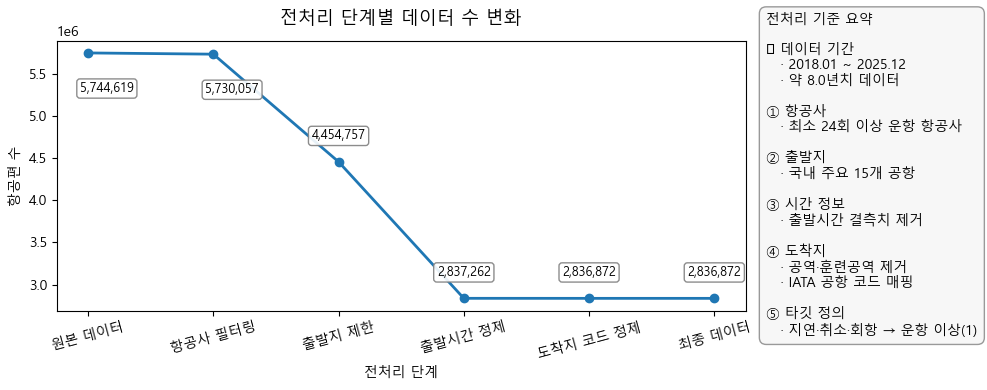

In [34]:
import matplotlib.pyplot as plt

# =========================
# 📅 데이터 기간 계산
# =========================
start_date = df["일자_dt"].min()
end_date = df["일자_dt"].max()
num_years = round((end_date - start_date).days / 365, 1)

# =========================
# 📊 전처리 단계별 데이터 수
# =========================
preprocess_steps = [
    "원본 데이터",
    "항공사 필터링",
    "출발지 제한",
    "출발시간 정제",
    "도착지 코드 정제",
    "최종 데이터"
]

preprocess_counts = [
    len(df),
    len(df[df["항공사"].notna() & df["항공사"].isin(valid_airlines)]),
    len(df[df["항공사"].notna() & df["항공사"].isin(valid_airlines)
           & df["출발지"].isin(valid_departures)]),
    len(df[df["항공사"].notna() & df["항공사"].isin(valid_airlines)
           & df["출발지"].isin(valid_departures)
           & df["출발시간"].notna()]),
    len(df_filtered),
    len(df_filtered)
]

plt.figure(figsize=(10, 4))

plt.plot(
    preprocess_steps,
    preprocess_counts,
    marker="o",
    linewidth=2
)

plt.title("전처리 단계별 데이터 수 변화", fontsize=13, pad=12)
plt.xlabel("전처리 단계")
plt.ylabel("항공편 수")
plt.xticks(rotation=15)

# =========================
# 🔢 숫자 위치 조정
# (앞 2개는 아래 + 오른쪽으로 이동)
# =========================
y_offset = max(preprocess_counts) * 0.04
x_offset = 0.15

for i, y in enumerate(preprocess_counts):
    x = i

    if i in [0, 1]:
        x_pos = x + x_offset
        y_pos = y - y_offset * 1.5
        va = "top"
    else:
        x_pos = x
        y_pos = y + y_offset
        va = "bottom"

    plt.text(
        x_pos,
        y_pos,
        f"{y:,}",
        ha="center",
        va=va,
        fontsize=9,
        bbox=dict(
            boxstyle="round,pad=0.25",
            facecolor="white",
            edgecolor="gray",
            alpha=0.9
        )
    )

# =========================
# 🧾 전처리 기준 요약 박스 + 데이터 기간
# =========================
criteria_text = (
    "전처리 기준 요약\n\n"
    f"📅 데이터 기간\n"
    f"   · {start_date.strftime('%Y.%m')} ~ {end_date.strftime('%Y.%m')}\n"
    f"   · 약 {num_years}년치 데이터\n\n"
    "① 항공사\n"
    "   · 최소 24회 이상 운항 항공사\n\n"
    "② 출발지\n"
    "   · 국내 주요 15개 공항\n\n"
    "③ 시간 정보\n"
    "   · 출발시간 결측치 제거\n\n"
    "④ 도착지\n"
    "   · 공역·훈련공역 제거\n"
    "   · IATA 공항 코드 매핑\n\n"
    "⑤ 타깃 정의\n"
    "   · 지연·취소·회항 → 운항 이상(1)"
)

plt.gca().text(
    1.03, 0.5,
    criteria_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    va="center",
    ha="left",
    bbox=dict(
        boxstyle="round,pad=0.5",
        facecolor="#F7F7F7",
        edgecolor="#999999"
    )
)

plt.tight_layout()
plt.savefig("ppt_02_전처리_단계별_데이터수_및_기준_최종.png", dpi=200)
plt.show()


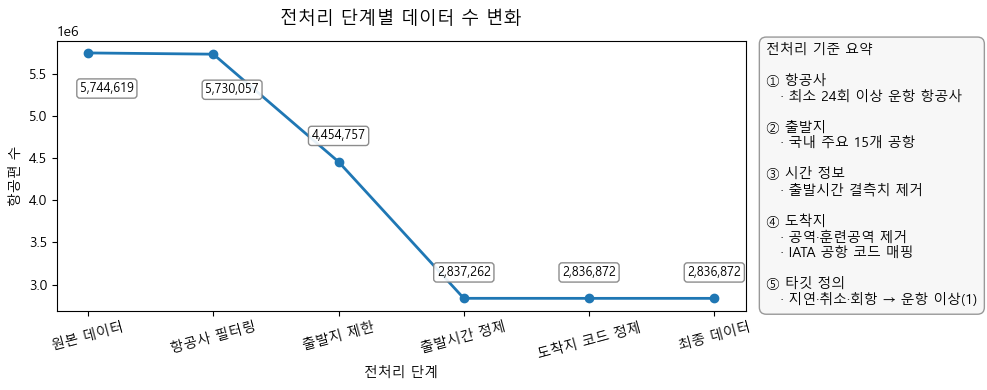

In [33]:
import matplotlib.pyplot as plt

# =========================
# 📊 전처리 단계별 데이터 수
# =========================
preprocess_steps = [
    "원본 데이터",
    "항공사 필터링",
    "출발지 제한",
    "출발시간 정제",
    "도착지 코드 정제",
    "최종 데이터"
]

preprocess_counts = [
    len(df),
    len(df[df["항공사"].notna() & df["항공사"].isin(valid_airlines)]),
    len(df[df["항공사"].notna() & df["항공사"].isin(valid_airlines)
           & df["출발지"].isin(valid_departures)]),
    len(df[df["항공사"].notna() & df["항공사"].isin(valid_airlines)
           & df["출발지"].isin(valid_departures)
           & df["출발시간"].notna()]),
    len(df_filtered),
    len(df_filtered)
]

plt.figure(figsize=(10, 4))

plt.plot(
    preprocess_steps,
    preprocess_counts,
    marker="o",
    linewidth=2
)

plt.title("전처리 단계별 데이터 수 변화", fontsize=13, pad=12)
plt.xlabel("전처리 단계")
plt.ylabel("항공편 수")
plt.xticks(rotation=15)

# =========================
# 🔢 숫자 위치 조정
# (앞 2개는 아래 + 오른쪽으로 이동)
# =========================
y_offset = max(preprocess_counts) * 0.04
x_offset = 0.15   # 👉 오른쪽 이동 정도 (0.1~0.2 사이가 적당)

for i, y in enumerate(preprocess_counts):

    # 기본 x 위치 (카테고리 인덱스)
    x = i

    # 🔽 원본 데이터, 항공사 필터링 → 아래 + 오른쪽
    if i in [0, 1]:
        x_pos = x + x_offset
        y_pos = y - y_offset * 1.5
        va = "top"
    else:
        x_pos = x
        y_pos = y + y_offset
        va = "bottom"

    plt.text(
        x_pos,
        y_pos,
        f"{y:,}",
        ha="center",
        va=va,
        fontsize=9,
        bbox=dict(
            boxstyle="round,pad=0.25",
            facecolor="white",
            edgecolor="gray",
            alpha=0.9
        )
    )


# =========================
# 🧾 전처리 기준 요약 박스 (가독성 강화)
# =========================
criteria_text = (
    "전처리 기준 요약\n\n"
    "① 항공사\n"
    "   · 최소 24회 이상 운항 항공사\n\n"
    "② 출발지\n"
    "   · 국내 주요 15개 공항\n\n"
    "③ 시간 정보\n"
    "   · 출발시간 결측치 제거\n\n"
    "④ 도착지\n"
    "   · 공역·훈련공역 제거\n"
    "   · IATA 공항 코드 매핑\n\n"
    "⑤ 타깃 정의\n"
    "   · 지연·취소·회항 → 운항 이상(1)"
)

plt.gca().text(
    1.03, 0.5,
    criteria_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    va="center",
    ha="left",
    bbox=dict(
        boxstyle="round,pad=0.5",
        facecolor="#F7F7F7",
        edgecolor="#999999"
    )
)

plt.tight_layout()
plt.savefig("ppt_02_전처리_단계별_데이터수_및_기준_개선.png", dpi=200)
plt.show()


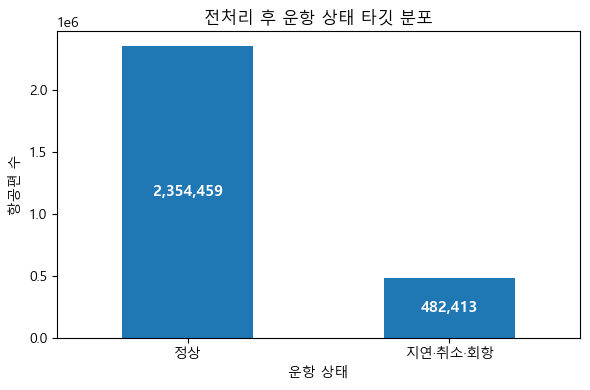

In [28]:
import matplotlib.pyplot as plt

target_counts = df_filtered["is_delay"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
ax = target_counts.plot(kind="bar")

plt.xticks(
    ticks=[0, 1],
    labels=["정상", "지연·취소·회항"],
    rotation=0
)

plt.title("전처리 후 운항 상태 타깃 분포")
plt.xlabel("운항 상태")
plt.ylabel("항공편 수")

# 🔢 막대 안쪽 중앙에 숫자 표시 (가독성 개선)
for i, v in enumerate(target_counts.values):
    ax.text(
        i,
        v * 0.5,          # 막대 중앙
        f"{v:,}",
        ha="center",
        va="center",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

plt.tight_layout()
plt.savefig("ppt_01_전처리_후_운항상태_타깃분포.png", dpi=200)
plt.show()
